# ABEL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework and required classes

In [1]:
from abel import *
import numpy as np
import scipy.constants as SI
%load_ext autoreload
%autoreload 2

### Define electron linac (PWFA)

In [2]:
# define driver
driver_source = SourceBasic()
driver_source.charge = -2.7e10 * SI.e # [C]
driver_source.energy = 0.15e9 # [eV]
driver_source.rel_energy_spread = 0.01
driver_source.bunch_length = 42e-6 # [m]
driver_source.z_offset = 300e-6 # [m]
driver_source.emit_nx, driver_source.emit_ny = 10e-6, 10e-6 # [m rad]
driver_source.beta_x, driver_source.beta_y = 30e-3, 30e-3 # [m]
driver_source.num_particles = 5000
driver_source.wallplug_efficiency = 0.5

# define driver accelerator
#driver_accel = RFAcceleratorBasic()
driver_accel = RFAcceleratorCLICopti()
driver_accel.nom_energy_gain = 31.1e9 # [eV]
driver_accel.nom_accel_gradient = 10e6 # [V/m]

# define driver complex
driver_complex = DriverComplex()
driver_complex.source = driver_source
driver_complex.rf_accelerator = driver_accel
driver_complex.turnaround = TurnaroundBasic()

# define stage
stage = StageBasic()
stage.driver_source = driver_complex
stage.nom_accel_gradient = 2e9 # [m]
stage.plasma_density = 1e21 # [m^-3]
stage.ramp_beta_mag = 5

# define beam
esource = SourceBasic()
esource.charge = -1e10 * SI.e # [C]
esource.energy = 5e9 # [eV]
esource.rel_energy_spread = 0.01
esource.bunch_length = 18e-6 # [m]
esource.z_offset = -34e-6 # [m]
esource.emit_nx, esource.emit_ny = 160e-6, 0.56e-6 # [m rad]
esource.beta_x = stage.matched_beta_function(esource.energy)
esource.beta_y = esource.beta_x
esource.num_particles = 1000
esource.wallplug_efficiency = 0.1
esource.accel_gradient = 25e6 # [V/m]

# define interstage
interstage = InterstagePlasmaLensBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.length_dipole = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.field_dipole = 0.5 # [T]

# define electron BDS
ebds = BeamDeliverySystemBasic()
ebds.beta_x, ebds.beta_y = 3.3e-3, 0.1e-3 # [m]
ebds.bunch_length = 0.75 * ebds.beta_y

# define electron linac
elinac = PlasmaLinac()
elinac.driver_complex = driver_complex
elinac.source = esource
elinac.stage = stage
elinac.interstage = interstage
elinac.bds = ebds
elinac.num_stages = 16
elinac.alternate_interstage_polarity = True

### Define the positron linac (RF)

In [3]:
# define positron source
psource = SourceBasic()
psource.charge = 4e10 * SI.e # [C]
psource.energy = 60e6 # [eV]
psource.rel_energy_spread = 0.0015
psource.bunch_length = 75e-6 # [m]
psource.emit_nx, psource.emit_ny = 1e-2, 1e-2 # [m rad]
psource.beta_x = 10 # [m]
psource.beta_y = 10 # [m]
psource.num_particles = esource.num_particles
psource.wallplug_efficiency = 0.5
psource.accel_gradient = 25e6 # [V/m]

# injector
pinjector = RFAcceleratorBasic()
pinjector.nom_accel_gradient = 25e6 # [V/m]
pinjector.nom_energy_gain = 2.80e9 # [V/m]

# damping ring
damping_ring = DampingRingBasic()
damping_ring.emit_nx_target = 10e-6 # [m rad]
damping_ring.emit_ny_target = 0.035e-6 # [m rad]

# define RF accelerator
#paccel = RFAcceleratorBasic()
paccel = RFAcceleratorCLICopti()
paccel.nom_accel_gradient = 25e6 # [V/m]

pturnaround = TurnaroundBasic()

# define positron BDS
pbds = BeamDeliverySystemBasic()
pbds.beta_x = 3.3e-3 # [m]
pbds.beta_y = 0.1e-3 # [m]

# define positron linac
plinac = ConventionalLinac()
plinac.rf_injector = pinjector
plinac.damping_ring = damping_ring
plinac.source = psource
plinac.rf_accelerator = paccel
#plinac.turnaround = pturnaround
plinac.bds = pbds

### Define the IP and collider

In [4]:
# define interaction point
#ip = InteractionPointGuineaPig()
ip = InteractionPointBasic()

# define collider (with two different linacs)
collider = Collider()
collider.linac1 = elinac
collider.linac2 = plinac
collider.ip = ip
collider.com_energy = 250e9
collider.energy_asymmetry = 2.5
collider.bunch_separation = 80e-9 # [s]
collider.num_bunches_in_train = 200
collider.rep_rate_trains = 100 # [Hz]

### Perform collider tracking

In [5]:
# track particles
collider.run('collider_example', num_shots=1, overwrite=True);

>> LINAC #1
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε =164.06/  0.54 mm-mrad
    ... #1  StageBasic #1           (s =  209.6 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.2%, ε =164.40/  0.55 mm-mrad
    ... #2  InterstagePlasmaLensBasic (s =  218.9 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.2%, ε =164.40/  0.55 mm-mrad
    ... #3  StageBasic #2           (s =  228.6 m) :   E =  43.4 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.1%, ε =164.42/  0.54 mm-mrad
    ... #4  InterstagePlasmaLensBasic (s =  241.1 m) :   E =  43.4 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.1%, ε =164.42/  0.54 mm-mrad
    ... #5  StageBasic #3           (s =  250.7 m) :   E =  62.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.1%, ε =164.43/  0.54 mm-mrad
    ... #6  InterstagePlasmaLensBasic (s =  265.7 m) :   E =  62.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.1%, ε =164.43/  0.54 mm-mrad
    ... #7  StageBasic #4     

In [6]:
collider.print_cost()

-- COSTS -----------------------------------------
-- Construction: 5570 MILCU
   -- Plasma linac: 1301 MILCU
      -- Source: 10 MILCU
      -- Driver complex: 1050 MILCU
         -- Source: 10 MILCU
         -- Driver RF linac: 829 MILCU
            -- Instrumented beamline (29%): 14 MILCU
            -- RF structures (1841x): 254 MILCU
            -- Klystrons (1842x, 15 MW peak, 41 kW avg): 562 MILCU
         -- Turnaround: 59 MILCU
         -- Civil construction: 151 MILCU
            -- Driver source (cut & cover + surface building): 0 MILCU
            -- Driver RF linac (cut & cover + surface building): 134 MILCU
            -- TurnaroundBasic (small tunnel): 17 MILCU
      -- Plasma stages (16x): 7 MILCU
      -- Interstages: 14 MILCU
      -- Driver dumps (16x, 7 MW total): 16 MILCU
      -- Driver delay chicanes (left+right): 40 MILCU
      -- BDS (1x): 72 MILCU
      -- Civil construction: 92 MILCU
         -- SourceBasic: 7 MILCU
         -- BDS: 66 MILCU
         -- Plasm

In [7]:
#collider.print_power()
collider.linac1.driver_complex.wallplug_power()

75024223.48874025

In [8]:
collider.print_emissions()

-- EMISSIONS ------------------------------------
>> Construction emissions (10.7 km): 118 kton CO2e
>> Operation emissions (36.1 TWh):   722 kton CO2e
-------------------------------------------------
>> Total emissions:                 840 kton CO2e
-------------------------------------------------


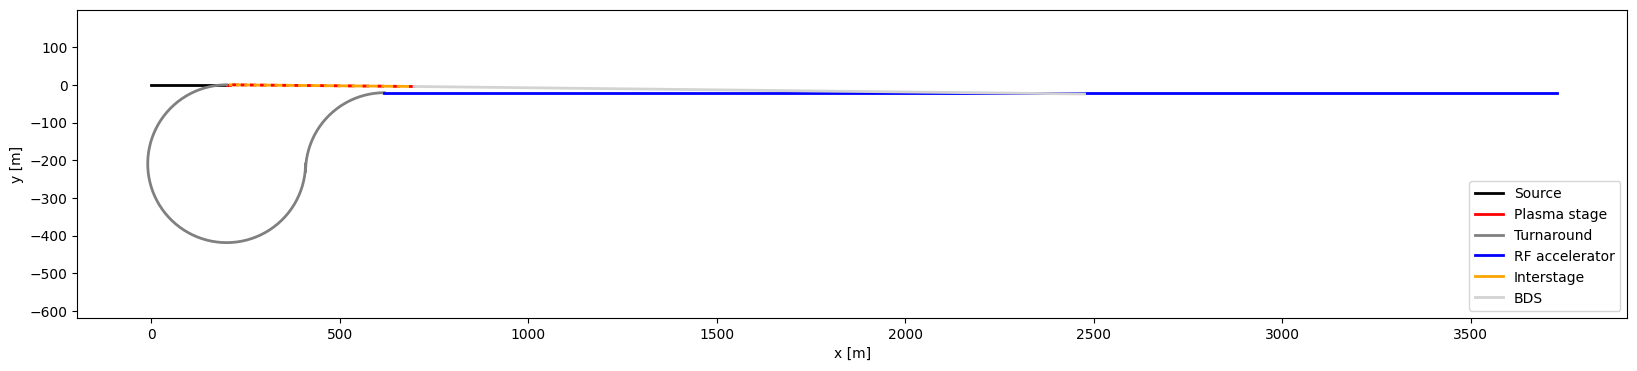

In [9]:
collider.linac1.plot_survey()

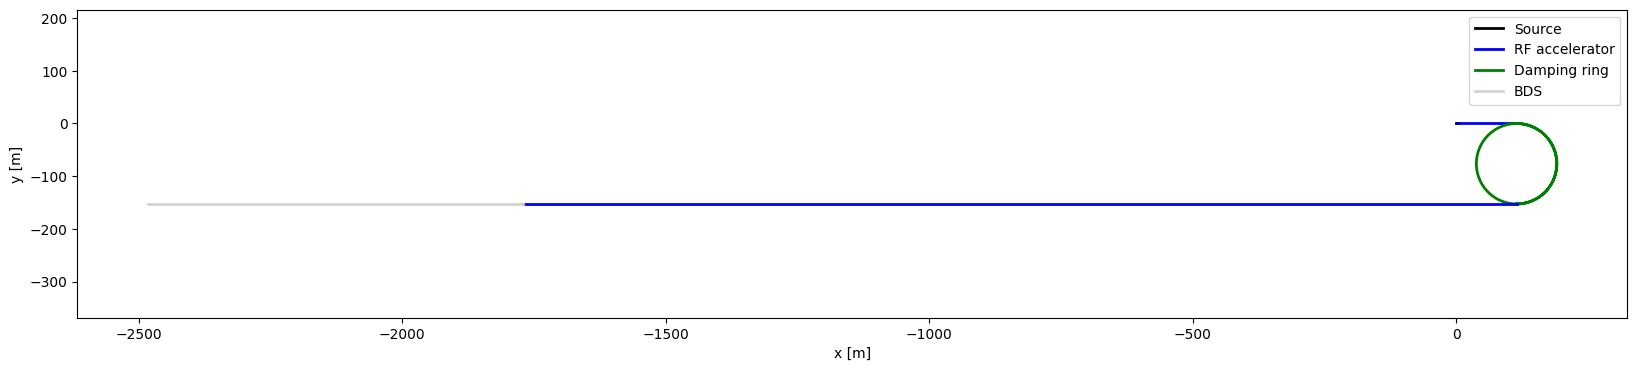

In [10]:
collider.linac2.plot_survey()

### Plot the wakefield structure

In [11]:
# plot wakefield
elinac.stage.plot_wake()

Stage::plot_wake(): No wake calculated.


### Plot the beam evolution in the linac

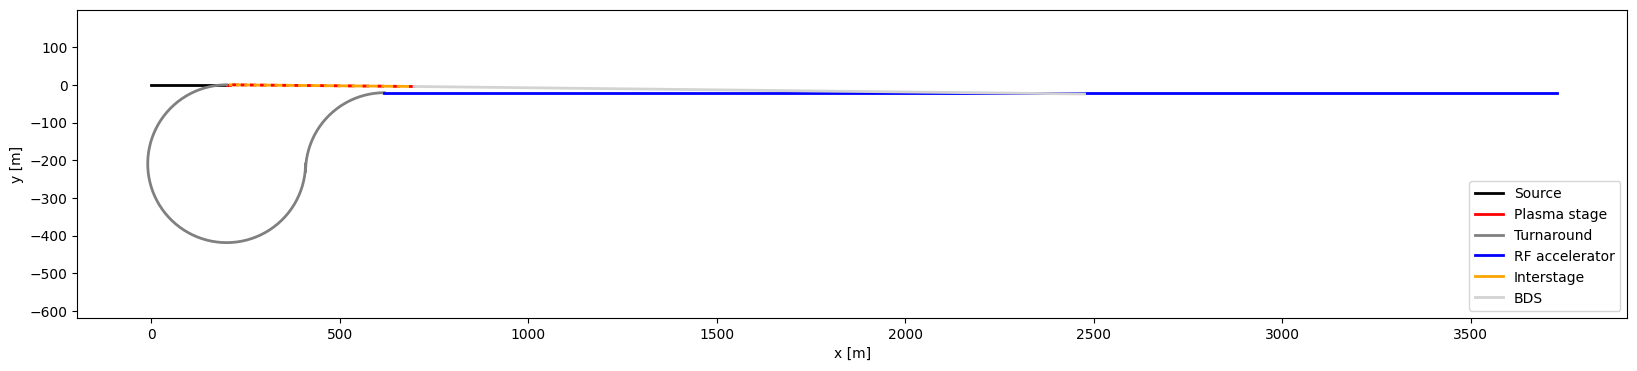

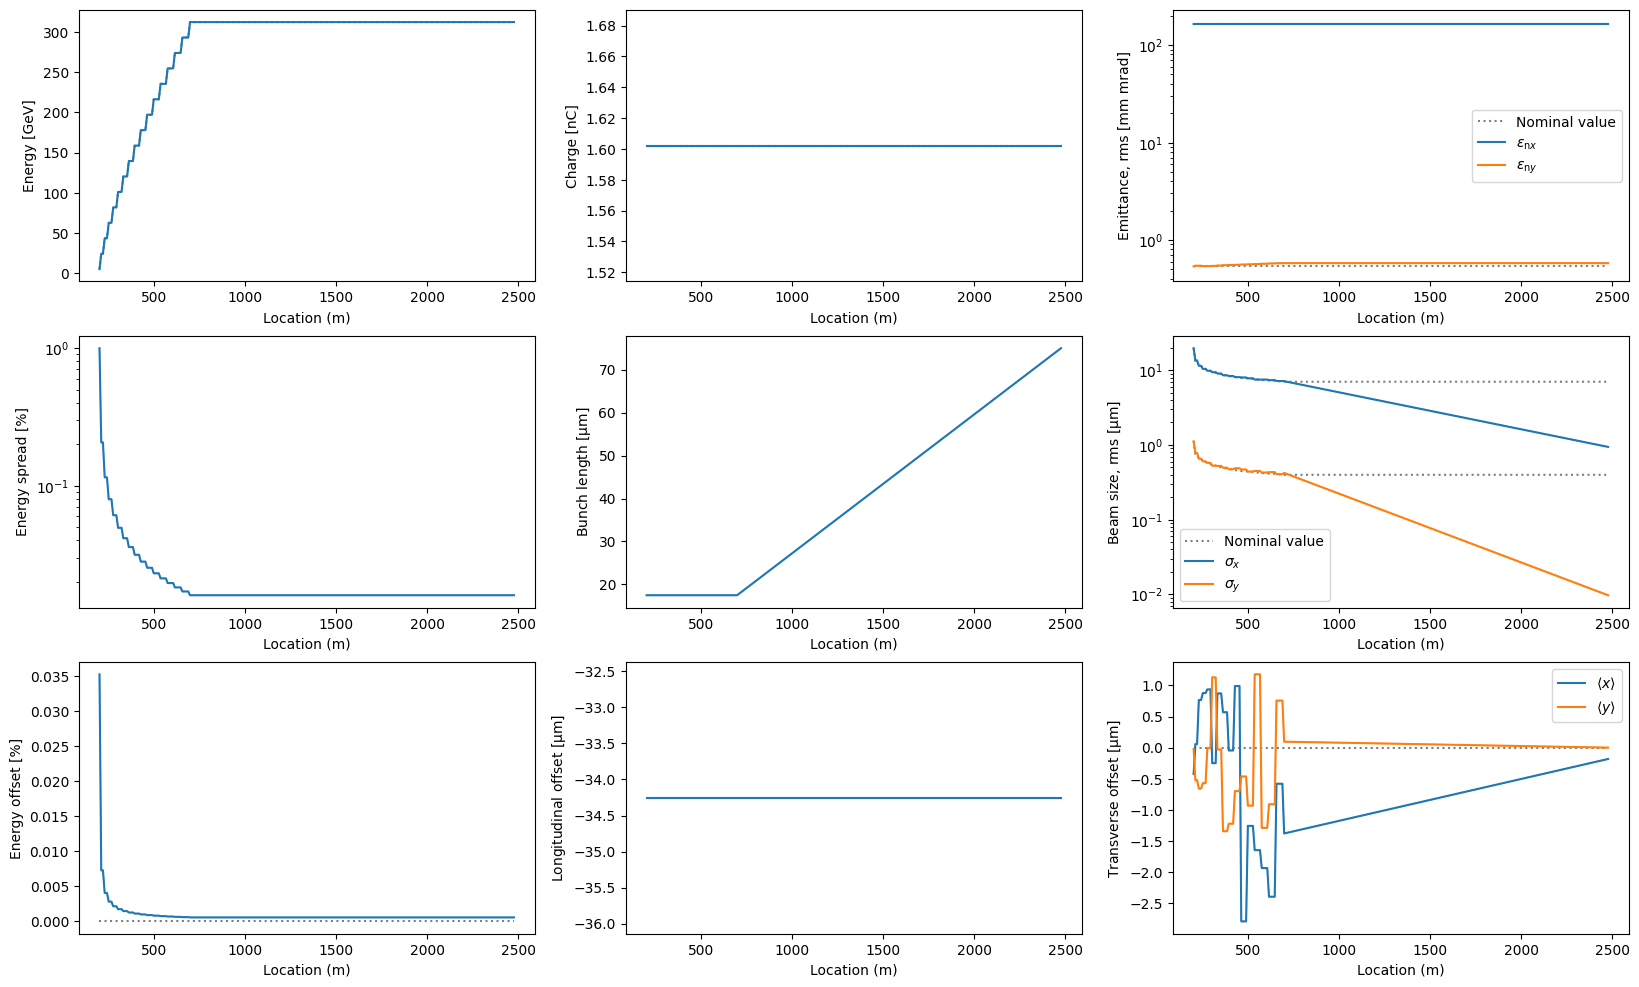

In [12]:
# plot beam evolution and linac survey
elinac.plot_survey()
elinac.plot_evolution(use_stage_nums=False)

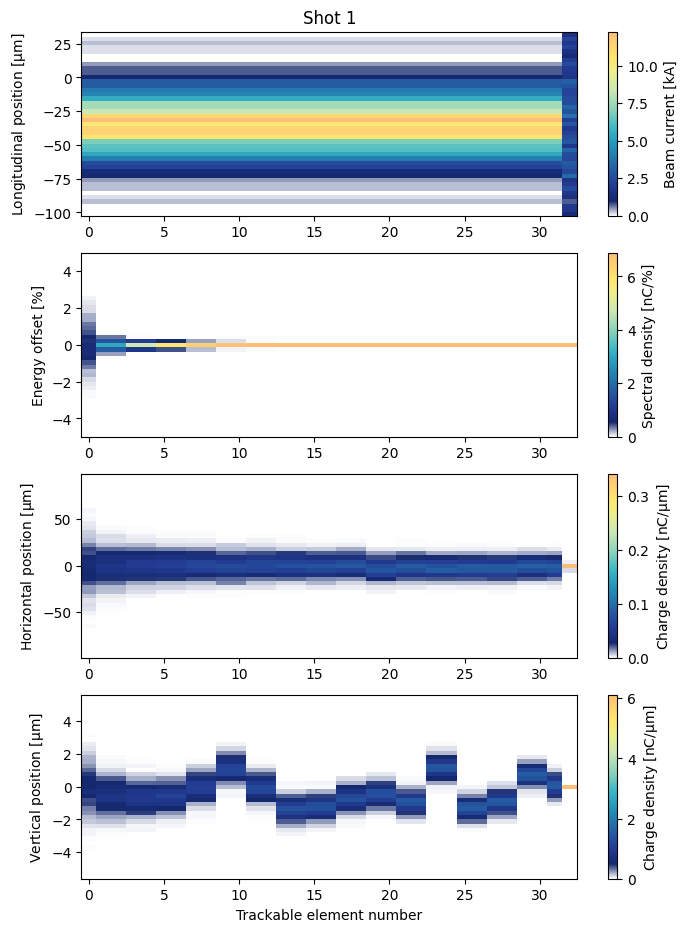

In [13]:
elinac.plot_waterfalls()

### Plot the collider luminosity

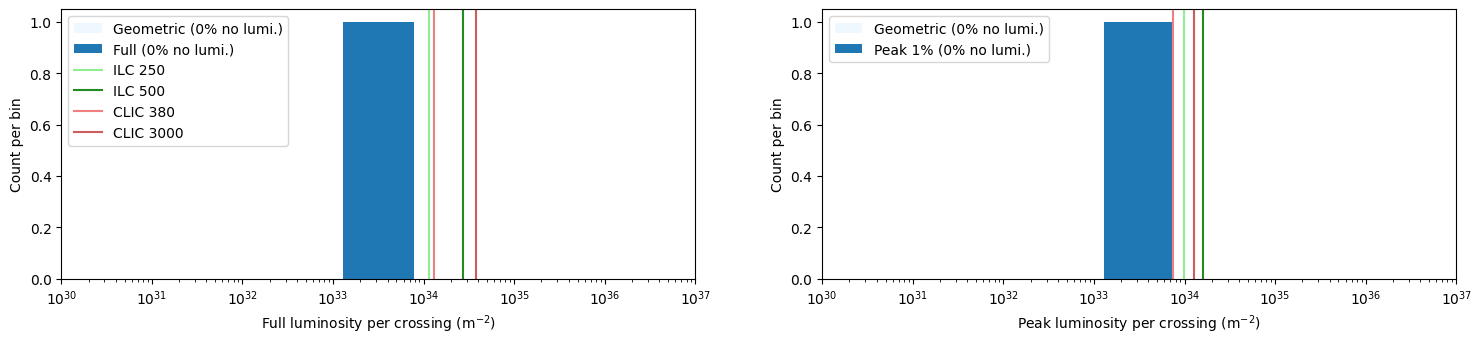

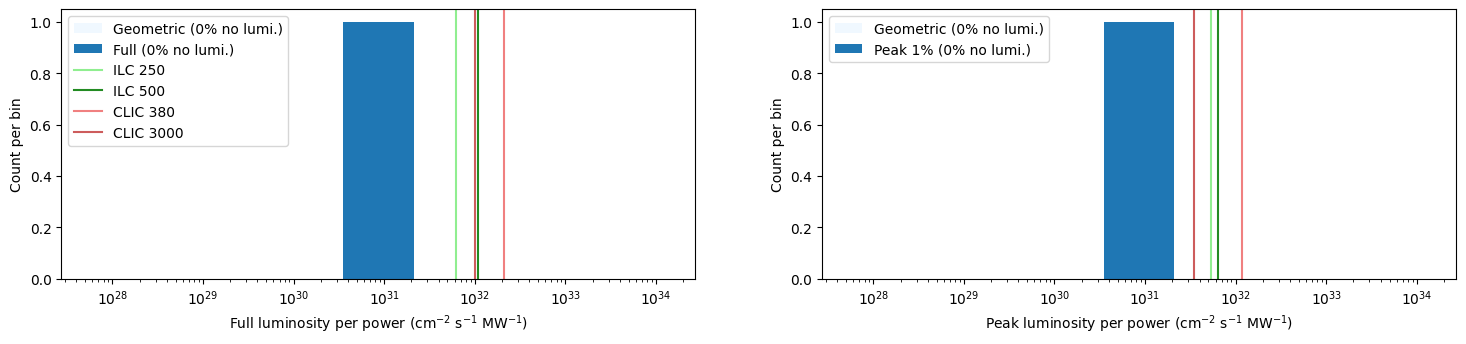

In [14]:
# plot luminosity
collider.plot_luminosity()

# plot luminosity per power
collider.plot_luminosity_per_power()